# 2. CNNs Introduction - Fundamentals 2
# Fundamentals of Convolutional Neural Networks 3 - Filling some Gaps

Welcome to the fourth notebook in the Convolutional Neural Network series. As I pointed out in the last notebook, in this notebook we will learn about LeNet-5 which is one of the pioneer architectures and ancestor of modern Convolutional Neural Network architectures. LeNet-5 was introduced by Yann LeCun, Leon Bottou, Yoshua Bengio, and Patrick Haner in their paper titled [Gradient-based learning applied to document recognition](http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf) in 1998 and widely used for handwritten digit recognition in bank cheques.  

The architecture has the following structure:

1. Three convolutional layers (C1, C3, C5) with 5x5 kernels and unit-stride.
2. Two Average Pooling Layers (S2 and S4) with 2x2 pool-size and unit-stride.
3. Two fully-connected layers: One with 84 neurons (F6), which is followed by the final output layer with 10 neurons.
4. All the layers except the output layer use the tanh activation (sigmoid squashing function), and the last layer uses the Euclidean Radial Basis Function (RBF). The reason for using the tanh activation function, instead of the sigmoid activation function is to avoid saturation during the backpropagation (Remember that at this time, the gradients were much more likely to explode or vanish).

The whole architecture can be summarized as the following:


<figure class="wp-block-table color: black"><table><thead><tr><th class="has-text-align-center" data-align="center"> Layer Type</th><th class="has-text-align-center" data-align="center"> Feature Map </th><th class="has-text-align-center" data-align="center"> Size </th><th class="has-text-align-center" data-align="center"> Kernel Size </th><th class="has-text-align-center" data-align="center"> Stride </th><th class="has-text-align-center" data-align="center"> Activation </th></tr></thead><tbody><tr><td class="has-text-align-center" data-align="center">Image </td><td class="has-text-align-center" data-align="center">1</td><td class="has-text-align-center" data-align="center">32×32</td><td class="has-text-align-center" data-align="center">–</td><td class="has-text-align-center" data-align="center">–</td><td class="has-text-align-center" data-align="center">–</td></tr><tr><td class="has-text-align-center" data-align="center">Convolution </td><td class="has-text-align-center" data-align="center">6</td><td class="has-text-align-center" data-align="center">28×28</td><td class="has-text-align-center" data-align="center">5×5</td><td class="has-text-align-center" data-align="center">1</td><td class="has-text-align-center" data-align="center">tanh</td></tr><tr><td class="has-text-align-center" data-align="center">Average Pooling </td><td class="has-text-align-center" data-align="center">6</td><td class="has-text-align-center" data-align="center">14×14</td><td class="has-text-align-center" data-align="center">2×2</td><td class="has-text-align-center" data-align="center">2</td><td class="has-text-align-center" data-align="center"> –</td></tr><tr><td class="has-text-align-center" data-align="center">Convolution </td><td class="has-text-align-center" data-align="center"> 16</td><td class="has-text-align-center" data-align="center">10×10</td><td class="has-text-align-center" data-align="center">5×5</td><td class="has-text-align-center" data-align="center">1</td><td class="has-text-align-center" data-align="center"> tanh </td></tr><tr><td class="has-text-align-center" data-align="center">Average Pooling </td><td class="has-text-align-center" data-align="center">16</td><td class="has-text-align-center" data-align="center">5×5</td><td class="has-text-align-center" data-align="center">2×2</td><td class="has-text-align-center" data-align="center">2</td><td class="has-text-align-center" data-align="center"> –</td></tr><tr><td class="has-text-align-center" data-align="center">Convolution </td><td class="has-text-align-center" data-align="center">120</td><td class="has-text-align-center" data-align="center">1x1</td><td class="has-text-align-center" data-align="center">5x5</td><td class="has-text-align-center" data-align="center">1</td><td class="has-text-align-center" data-align="center"> tanh </td></tr><tr><td class="has-text-align-center" data-align="center">Fully Connected </td><td class="has-text-align-center" data-align="center">–</td><td class="has-text-align-center" data-align="center">84</td><td class="has-text-align-center" data-align="center">–</td><td class="has-text-align-center" data-align="center">–</td><td class="has-text-align-center" data-align="center"> tanh </td></tr><tr><td class="has-text-align-center" data-align="center">Fully Connected </td><td class="has-text-align-center" data-align="center">–</td><td class="has-text-align-center" data-align="center">10</td><td class="has-text-align-center" data-align="center">–</td><td class="has-text-align-center" data-align="center">–</td><td class="has-text-align-center" data-align="center">RBF</td></tr></tbody></table></figure>

The table is adapted from: <a href="https://datahacker.rs/lenet-5-implementation-tensorflow-2-0/"> Source </a>


As you can see, we are already familiar with the components of this Convolutional Neural Network architecture except for the RBF function. The Euclidean Radial Basis function is defined as the following:

$$y_i=\sum _j\:\left(x_j-w_{ij}\right)^2$$

This function calculates the Euclidean distance between the input vector (output of F6) and the weight vector. More specifically, it works as the following:


* The output of a particular RBF can be interpreted as a penalty term measuring the fit between the input pattern and a model of the class associated with the RBF. In probabilistic terms, the RBF output can be interpreted as the unnormalized negative log-likelihood of a Gaussian distribution in the space of configurations of layer F6. Given an input pattern, the loss function should be designed so as to get the configuration of F6 as close as possible to the parameter vector of the RBF that corresponds to the pattern's desired class. - [LECUN, Yann, et al.](http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf)

The authors used the Maximum a Posteriori Criterion as the Loss function which is defined as the following:

$$E\left(W\right)=\frac{1}{P}\sum _{p=1}^P\:\left(y_{D^{\:p}}\left(Z^{\:p},W\right)+log\left(e^{\:-j}+\sum _i\:e^{-y_i\left(Z^{\:p},W\right)}\right)\right)$$

* The loss function corresponds to maximizing the posterior probability of the correct class $D_p$ (or minimizing the logarithm of the probability of the correct class), given that the input image can come from one of the classes or from a background "rubbish" class label. In terms of penalties, it means that in addition to pushing down the penalty of the correct class like the Mean Squared Error criterion, this criterion also pulls up the penalties of the incorrect classes. - [LECUN, Yann, et al.](http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf)

There are several reasons why the authors chose this loss function over Mean Squared Error such as MAP is a better solution for the collapsing problem. However, I chose not to cover these technical details here because you will soon see that we will actually use neither MAP nor the RBF function. Nonetheless, you can refer to pages 8 and 9 of the original paper to learn more about both the RBF function and MAP criterion. 

The RBF function and MAP criterion do not have many use cases in Modern Deep Learning, and therefore libraries such as TensorFlow do not provide an implementation for these functions. For the output layer, we will be using the softmax activation function which takes the raw predictions (a.k.a logits) of the network and normalizes them into a probability distribution. The function achieves this by normalizing the vector so that its values are between 0 and 1, and they sum up to 1. In this way, we can interpret the network's predictions into per-class probability. Moreover, we will be using the cross-entropy loss as the loss function which basically calculates the difference between two probability distributions. The model we will be implementing can be visualised as the following: 

<img src="imgs/image14.png" width="90%">
<a href=""> Source </a>

One thing you may realize here is that the diagram shows two Fully Connected layers, instead of one. The last convolution layer (C5) is using 5x5 kernel and we can interpret this convolutional layer as a Fully Connected Layer since every pixel in the following layer (S4) is connected to each neuron in C5. The authors of the original paper also mentioned this in the their paper as the following:

* Layer C5 is a convolutional layer with 120 feature maps. Each unit is connected to a 5x5 neighborhood on all 16 of S4's feature maps. Here because the size of S4 is also 5x5, the size of C5's feature maps is 1x1; this amounts to a full connection between S4 and C5. - [LECUN, Yann, et al.](http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf)

Yann Lecun also has a discussion about equivalence of dense layers to CNNs, you can find it here [link](https://www.facebook.com/yann.lecun/posts/10152820758292143)

If you would like to learn further, check out the links below:

1. [Can Fully Connected Layers be Replaced by Convolutional Layers?](https://sebastianraschka.com/faq/docs/fc-to-conv.html)

2. [How are 1x1 convolutions the same as a fully connected layer?](https://datascience.stackexchange.com/questions/12830/how-are-1x1-convolutions-the-same-as-a-fully-connected-layer)

Let's first load the MNIST dataset.

In [1]:
import tensorflow.keras as keras
from tensorflow.keras import Model, Sequential, Input
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
(X_train_full, y_train_full), (X_valid, y_valid) = keras.datasets.fashion_mnist.load_data()

X_train_full = X_train_full/255.
X_valid = X_valid/255.


29515/29515 [==============================] - 0s 0us/step


26421880/26421880 [==============================] - 0s 0us/step


5148/5148 [==============================] - 0s 0us/step


4422102/4422102 [==============================] - 0s 0us/step


Now we will implement the LeNet-5 using `tensorflow.keras.Sequential()`.

In [3]:
LeNet5_Sequential= Sequential([
    Input(shape=(28,28,1)),
    Conv2D(filters=6, kernel_size=(5,5), activation='tanh',  padding="same", name="C1"),
    AveragePooling2D(pool_size=(2, 2), name="S2"),
    Conv2D(filters=16,kernel_size=(5,5), activation='tanh', padding="valid", name="C3"),
    AveragePooling2D(pool_size=(2, 2), name="S4"),
    Conv2D(filters=120, kernel_size=(5,5), activation='tanh', padding="valid", name="C5"),
    Flatten(),
    Dense(84, activation='tanh', name="F6"),
    Dense(10, activation='softmax', name="Output")
])

In [4]:
LeNet5_Sequential.summary()

Model: "sequential"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 C1 (Conv2D)                 (None, 28, 28, 6)         156       

                                                                 

 S2 (AveragePooling2D)       (None, 14, 14, 6)         0         

                                                                 

 C3 (Conv2D)                 (None, 10, 10, 16)        2416      

                                                                 

 S4 (AveragePooling2D)       (None, 5, 5, 16)          0         

                                                                 

 C5 (Conv2D)                 (None, 1, 1, 120)         48120     

                                                                 

 flatten (Flatten)           (None, 120)               0         

                                                                 

 F6 (Dense)                  (None, 84) 

I implemented the C5 layer as a convolutional layer, however, you can change it to a fully connected layer and I recommend trying it out to see if you get a similar result.

Let's compile the model and train it for 30 epochs.

In [5]:
LeNet5_Sequential.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [ ]:
history=LeNet5_Sequential.fit(X_train_full, y_train_full, epochs=30, validation_data=(X_valid, y_valid))

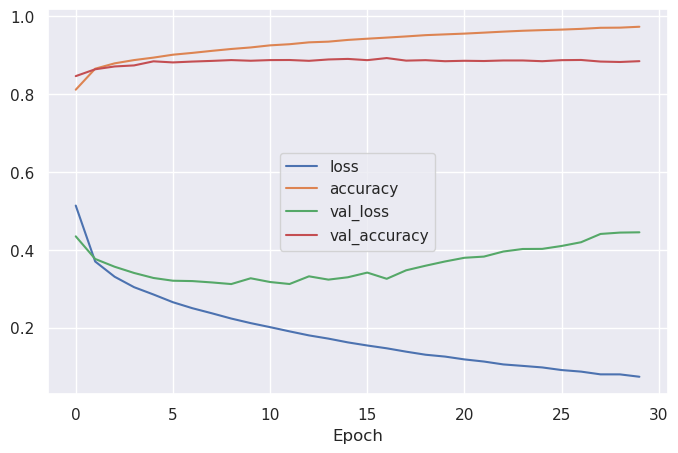

In [7]:
sns.set_theme()
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.xlabel("Epoch")
plt.legend(loc="best")
plt.show()

That's it for the first part of this notebook! If you would like to learn more about LeNet-5, I recommend checking out the link below.

**Additional Sources**
1. [The Architecture of Lenet-5](https://www.analyticsvidhya.com/blog/2021/03/the-architecture-of-lenet-5/#:~:text=The%20first%20layer%20is%20the,at%20his%20layer%20is%20tanh)
2. [TF Implementing LeNet-5 in TensorFlow 2.0](https://datahacker.rs/lenet-5-implementation-tensorflow-2-0/)
3. [LeNet with TensorFlow](https://medium.com/analytics-vidhya/lenet-with-tensorflow-a35da0d503df)
4. [The Convolutional Neural Network - Theory and Implementation of LeNet-5 and AlexNet](https://pabloinsente.github.io/the-convolutional-network)
5. [Understanding and Implementing LeNet-5 CNN Architecture (Deep Learning)](https://towardsdatascience.com/understanding-and-implementing-lenet-5-cnn-architecture-deep-learning-a2d531ebc342)

I also recommend reading the original paper for LeNet-5. The paper reviews most of the commonly used algorithms of that time for pattern recognition, and therefore it is a very good starting point to understand what algorithms people used to use back then.

Moreover, you may be curious about why the algorithm was named LeNet-5, for instance, Is there a LeNet-4? LeNet actually has some versions such as LeNet-4 or LeNet-1. You can find more about these versions in the following links:

1. [Summary: LeNet-1, LeNet-4, LeNet-5, Boosted LeNet-4 (Image Classification)](https://bootcamp.uxdesign.cc/summary-lenet-1-lenet-4-lenet-5-boosted-lenet-4-image-classification-df5673a61eb2)
2. [Break Down Lenet-4](https://arnabfly.github.io/arnab_blog/lenet4/)

## Training LeNet-5 on CIFAR-10 with Learning Rate Scheduling with Warm-ups

In this series, I will be also implementing the architectures using the Functional API of Tensorflow and training them on some toy datasets such as CIFAR-10 dataset, later I will compare the performance of each architecture on a bigger dataset. Moreover, I wanted to do some experiments with the training schemes, therefore, I will be also comparing three very closely related learning rate scheduling techniques. If you do not know what is learning rate scheduling, you can refer to Deep Learning Fundamentals with Tensorflow Repository or you can just Google it.

Let's load CIFAR10 and normalize it.

In [1]:
import tensorflow as tf
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import SGD
import math
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

x_train = x_train/255.
x_test = x_test/255.

170498071/170498071 [==============================] - 2s 0us/step


Let's implement the model using the Functional API.

In [3]:
class LeNet5(Model): 
    def __init__(self, num_classes): 
        super(LeNet5, self).__init__()
        self.conv1 = Conv2D(filters=6, kernel_size=(5,5), activation='tanh', padding="same", name="C1")
        self.conv2 = Conv2D(filters=16,kernel_size=(5,5), activation='tanh', padding="valid", name="C3")
        self.avg_pool = AveragePooling2D(pool_size=(2, 2))
        self.flatten = Flatten()
        self.conv3 = Conv2D(filters=120, kernel_size=(5,5), activation='tanh', padding="valid", name="C5")
        self.dense1 = Dense(84, activation='tanh')
        self.dense2 = Dense(num_classes, activation='softmax')
    @tf.function
    def call(self, inputs): 
        stack1 = self.avg_pool(self.conv1(inputs)) 
        stack2 = self.avg_pool(self.conv2(stack1)) 
        flatten = self.flatten(self.conv3(stack2))
        output = self.dense2(self.dense1(flatten)) 
        return output 

### Learning Rate Warmup

Before moving on to training the network on CIFAR-10, let's also briefly discuss the learning rate scheduling techniques that we will be using. 

Learning Rate Warmup is a technique used to gradually increase the learning rate at the beginning of the training, rather than starting with a high learning rate right from the start, then we can also utilize a learning scheduler of our choice to gradually also decrease the learning rate. The primary reason for using warm-up with learning rate scheduling is to avoid instability or divergence at the beginning of training, while still allowing the model to quickly adapt to the training data.

* The learning rate warmup, is a recent approach that uses a relatively small step size at the beginning of the training. The learning rate is increased linearly or non-linearly to a specific value in the first few epochs, and then shrinks to zero. The observations behind the warmup are that: the model parameters are initialized using a random distribution, and thus, the initial model is far from the ideal one; thus, an overly large learning rate causes numerical instability; and training an initial model carefully in the first few epochs may enable us to apply a larger learning rate in the middle stage of the training, resulting in a better regularization. - [NAKAMURA, Kensuke, et al.](https://www.mdpi.com/2079-9292/10/16/2029)

Warm-up is generally used for each epoch or for each step size (batch). In general, using warm-up for each epoch is thought to be a good starting point for most models and it provides a gentle ramp-up of the learning rate at the beginning of training, which can help avoid the issues of instability or divergence that can occur if the learning rate is set too high at the outset. However, for more complex models or difficult optimization problems, using warm-ups for each step size can be beneficial. This is because more frequent adjustments to the learning rate can help the model adapt to changes in the loss landscape more quickly and avoid getting stuck in local minima. On the other hand, using a warm-up for each step size can also increase the computational cost of training, as it requires more frequent adjustments to the learning rate. Therefore, it's important to carefully balance the benefits of more frequent adjustments against the increased computational cost.

I will be training LeNet-5 and other architectures using warmup with cosine annealing, and I will implement both two warm-up schemes (for each epoch and each step size), in addition, I will also implement a very similar learning rate scheduler named WarmUpwithRestarts. I will compare the results of the models with these three schemes in the following notebooks after I complete talking about architectures. This experiment is going to be one of the practice parts of this notebook series.

Let's first implement the function we will be using for updating the learning rate each epoch

In [4]:
# Define the learning rate schedule function
def lr_schedule(epoch, lr, num_epochs, warmup_epoch):
    if epoch < warmup_epoch:
        lr = lr * (epoch + 1) / warmup_epoch
    else:
        lr = 0.5 * lr * (1 + math.cos((epoch - warmup_epoch) / (num_epochs - warmup_epoch) * math.pi))
        #cosine_lr = 0.5 * initial_lr * (1 + cos(epoch / num_epochs * pi))
    return lr

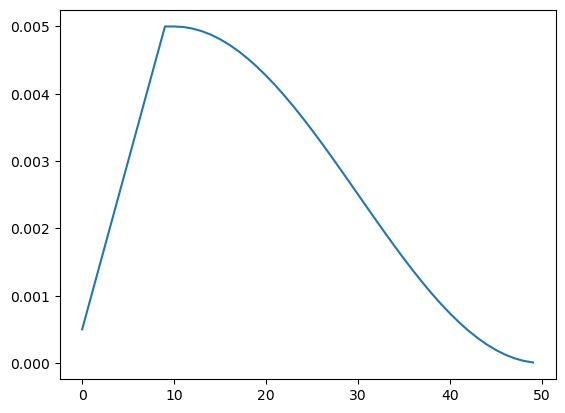

In [5]:
epoch=50
learning_rate=0.005
lrs = []
for step in range(epoch):
    lrs.append(lr_schedule(step, learning_rate,epoch,10))
plt.plot(lrs)

In the `lr_schedule()` function, we check if the current epoch is less than the warm-up epoch (which we set to 10 in our example in the function). If the epoch is less than the warm-up epoch, we linearly increase the learning rate from 0 to its initial value by multiplying it by the ratio of the current epoch number to the warm-up epoch number, plus 1. This results in a gradual increase in the learning rate over the first few epochs, which is the warm-up procedure. Once the current epoch is equal to or greater than the warm-up epoch, we switch to the cosine annealing schedule. This schedule gradually reduces the learning rate over the remaining epochs, resulting in a smoother and more stable training process. Additionally, multiplying the learning rate by 0.5 in the else case of the `lr_schedule()` function simply scales down the learning rate by half, as we are transitioning from the warm-up phase to the cosine annealing phase. This helps to prevent large fluctuations in the learning rate and ensures a smooth transition between the two phases.

Let's now train the network on CIFAR-10 using this method.

In [6]:
model1=LeNet5(10)

optimizer = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch, lr: lr_schedule(epoch, lr, 50, 10))

model1.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model1.build(input_shape=(None,32,32,3))

In [7]:
model1.summary()

Model: "le_net5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 C1 (Conv2D)                 multiple                  456       
                                                                 
 C3 (Conv2D)                 multiple                  2416      
                                                                 
 average_pooling2d (AverageP  multiple                 0         
 ooling2D)                                                       
                                                                 
 flatten (Flatten)           multiple                  0         
                                                                 
 C5 (Conv2D)                 multiple                  48120     
                                                                 
 dense (Dense)               multiple                  40404     
                                                           

In [ ]:
history=model1.fit(x_train, y_train, epochs=50, batch_size=256, validation_data=(x_test, y_test),callbacks=[lr_scheduler])

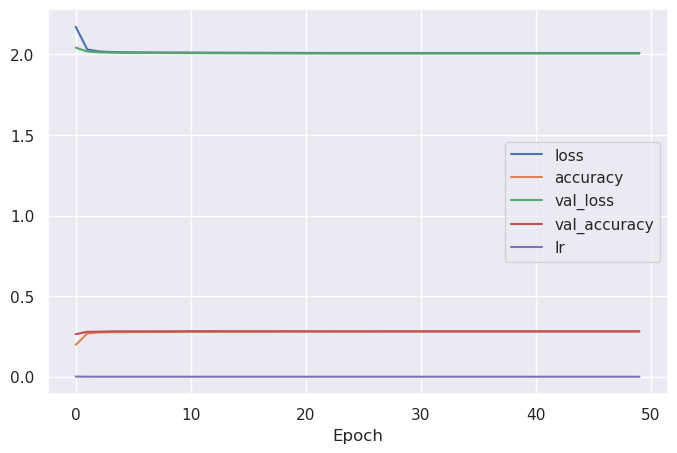

In [9]:
sns.set_theme()
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.xlabel("Epoch")
plt.legend(loc="best")
plt.show()

Let's also implement the warmup for each step and train the network again. As you know, a "step" usually refers to a single update of the model's parameters during training, based on a single batch of training data. The step size, then, is the number of batches of data that are processed before a single update is made to the model's parameters. For example, we have 50,000 instances in our training dataset and using a batch size of 256, then we have 196 steps to complete one epoch (50,000 images / 256 images per batch = 196 batches or steps). As previously mentioned, If we implement a warm-up for each step (batch), it would result in a more fine-grained adjustment of the learning rate, as the learning rate would be updated after each batch. This could potentially lead to faster convergence and better generalization performance, especially if you are training on a large dataset.

In [10]:
class WarmUpCallback(tf.keras.callbacks.Callback):
    def __init__(self, warmup_steps, initial_lr, num_epochs):
        super(WarmUpCallback, self).__init__()
        self.warmup_steps = warmup_steps
        self.initial_lr = initial_lr
        self.num_epochs = num_epochs
        self.global_step = 0
        self.lrs = []  
        
    def on_train_begin(self, logs=None):         
        self.steps_per_epoch = self.params['steps']
        self.total_steps = self.steps_per_epoch * self.num_epochs # steps_per_epoch * num_epochs = total_steps
        
    def on_train_batch_begin(self, batch, logs=None):
        self.global_step += 1
        lr = tf.keras.backend.get_value(self.model.optimizer.lr)
        if self.global_step <= self.warmup_steps:
            warmup_lr = self.initial_lr * (self.global_step / self.warmup_steps)
            tf.keras.backend.set_value(self.model.optimizer.lr, warmup_lr)
            self.lrs.append(warmup_lr)
        else:
            epoch = (self.global_step - self.warmup_steps) / (self.total_steps - self.warmup_steps) * 50
            cosine_lr = 0.5 * self.initial_lr * (1 + tf.math.cos(epoch / 50 * np.pi))
            tf.keras.backend.set_value(self.model.optimizer.lr, cosine_lr)
            self.lrs.append(cosine_lr)

The constructor takes three arguments: warmup_steps, which is the number of batches for the warm-up phase, initial_lr, which is the initial learning rate, and num_epochs, which is the total number of epochs. In the `on_train_begin()` method, we calculate the total number of steps by multiplying steps_per_epoch and num_epochs. In the `on_train_batch_begin()` method of the callback, we retrieve the current learning rate value using the get_value method of the Keras backend. If the current batch number is less than the warmup batch number, we calculate the warm-up learning rate by multiplying the initial learning rate by the ratio of the current batch number to the warm-up batch number, plus 1 (global_step / warmup_steps can be interpreted as the ratio of the current step number to the total number of warm-up steps, which is the same as current_batch / warmup_batches for the current batch number). We then set the learning rate of the optimizer using the set_value method of the Keras backend.

If the current batch number is greater than or equal to the warm-up batch number, we then calculate the learning rate using the cosine annealing. We then set the learning rate of the optimizer using the set_value method of the Keras backend. To use this callback during training, you can pass it as an argument to the fit method of your model without using `tf.keras.callbacks.LearningRateScheduler()` since we already subclass the `tf.keras.callbacks()` we do not need to use `LearningRateScheduler()` anymore.

We have 9800 steps in total, I will be using the first 2000 steps for warmup and the remaining for cosine decay. Let's train the model.

In [ ]:
model2=LeNet5(10)
optimizer = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
warmup_callback = WarmUpCallback(warmup_steps=2000, initial_lr=0.001, num_epochs=50)
model2.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model2.fit(x_train, y_train, epochs=50, batch_size=256, validation_data=(x_test, y_test),callbacks=[warmup_callback])

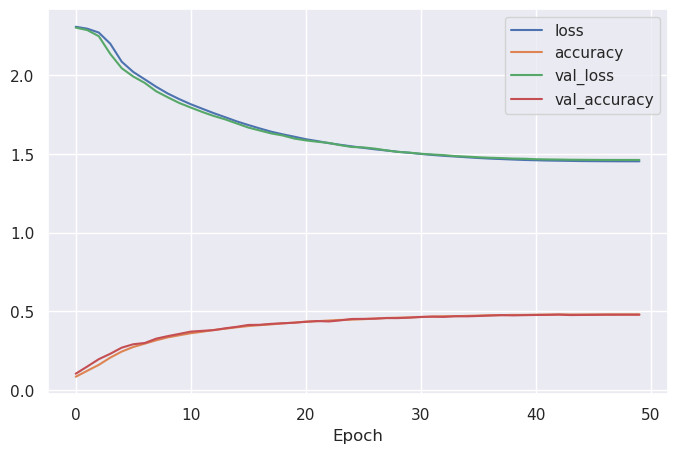

In [12]:
sns.set_theme()
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.xlabel("Epoch")
plt.legend(loc="best")
plt.show()

Let's also plot the learning rates.

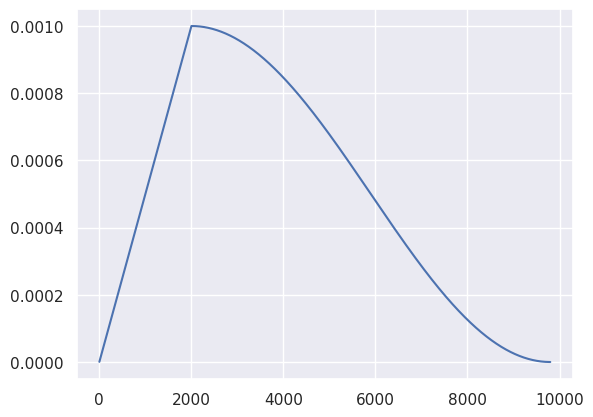

In [13]:
plt.plot(warmup_callback.lrs)

As it can be seen the learning rate followed the same trend as the first model, however, this time we updated the learning rate for each step. We also strongly improved the model's performance on validation data. 

On the other hand, there is another strategy for using warmup introduced in this paper: [SGDR: Stochastic Gradient Descent with Warm Restarts](https://arxiv.org/abs/1608.03983). Warmup with cosine annealing gradually increases the learning rate from an initial value to a target value over a certain number of steps or epochs, and then applies cosine annealing to smoothly decrease the learning rate over the remaining steps or epochs. Warmup restarters, on the other hand, involve a periodic restarting of the learning rate. This means that the learning rate is set back to its initial value periodically during training, which can help the optimizer avoid getting stuck in local minima and improve the overall optimization process. Basically, we can say that the warmup restarters approach is the cyclic learning rate schedule, where the learning rate is increased linearly from a low value to a high value over a certain number of steps, and then reset to the low value, and the process is repeated. Tensorflow provides `tf.keras.optimizers.schedules.CosineDecayRestarts()` that you can use for this purpose, however, I did my own a bit simpler implementation of this function, let's also try it out.

In [14]:
class WarmUpCosineDecayRestarts(tf.keras.callbacks.Callback):
    def __init__(self, num_epochs, warmup_steps=0, lr_init=0.001, lr_min=0.0,
                 lr_max=0.1, cycle_length=100, m_mul=1.0):
        super(WarmUpCosineDecayRestarts, self).__init__()
        self.num_epochs=num_epochs
        self.warmup_steps = warmup_steps
        self.lr_init = lr_init
        self.lr_min = lr_min
        self.lr_max = lr_max
        self.cycle_length = cycle_length
        self.m_mul = m_mul
        self.steps = 0
        self.lr = 0
        self.restart = False
        self.lrs=[]
        #warmup_steps: the number of steps for the warm-up phase
        #lr_init: the initial learning rate
        #lr_min: the minimum learning rate
        #lr_max: the maximum learning rate
        #cycle_length: the length of a cycle in steps
        #m_mul: the multiplier for the maximum learning rate and cycle length after a restart
    def on_train_begin(self, logs=None):         
        self.steps_per_epoch = self.params['steps']
        self.global_steps = self.steps_per_epoch * self.num_epochs # steps_per_epoch * num_epochs = total_steps
        
    def on_train_batch_begin(self, batch, logs=None):
        self.steps += 1
        if self.steps <= self.warmup_steps:
            self.lr = self.lr_init * (self.steps / self.warmup_steps)
            self.lrs.append(self.lr)
        else:
            if self.steps == self.warmup_steps + 1:
                self.restart = True
            if self.steps == self.global_steps + 1:
                self.steps = 1
                self.restart = True
            if self.restart:
                self.lr_max *= self.m_mul
                self.cycle_length = int(self.cycle_length * self.m_mul)
                self.lr = self.lr_min
                self.restart = False
            else:
                lr_range = self.lr_max - self.lr_min
                position = (self.steps - self.warmup_steps) / (self.global_steps - self.warmup_steps)
                cycle_position = position % (self.cycle_length / (self.global_steps - self.warmup_steps))
                self.lr = self.lr_min + 0.5 * lr_range * (1 + np.cos(np.pi * cycle_position / (self.cycle_length / (self.global_steps - self.warmup_steps))))
                self.lrs.append(self.lr)
        tf.keras.backend.set_value(self.model.optimizer.lr, self.lr)

The constructor takes a bunch of arguments that I explained in the comments of the function. `on_train_batch_begin()` method is called at the beginning of each training batch to update current learning rate based on the current step. During the warm-up phase, the learning rate is increased linearly from lr_init to lr_max. In the cosine annealing phase, the learning rate is updated using cosine annealing with restarts. A new cycle starts after cycle_length steps, and the maximum learning rate is multiplied by m_mul after each restart. The learning rate starts from lr_min and increases to lr_max following the cosine annealing schedule within each cycle. Finally, the learning rate is set using `tf.keras.backend.set_value()` to update the optimizer's learning rate. 

In [ ]:
model3=LeNet5(10)
optimizer = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
warmup_callback = WarmUpCosineDecayRestarts(num_epochs=50,warmup_steps=100, cycle_length=350)
model3.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model3.fit(x_train, y_train, epochs=50, batch_size=256, validation_data=(x_test, y_test),callbacks=[warmup_callback])

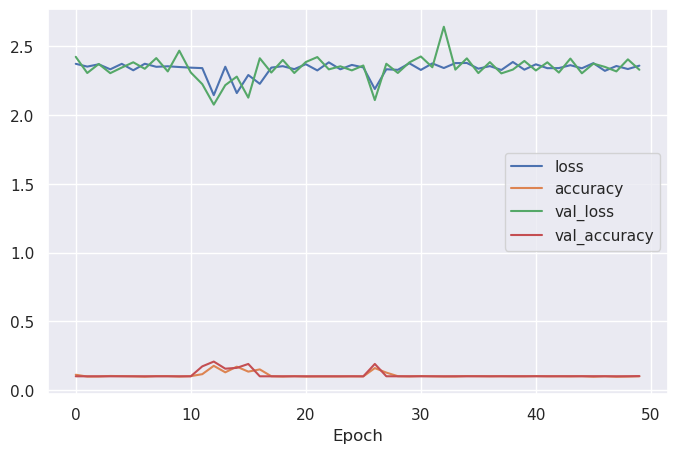

In [16]:
sns.set_theme()
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.xlabel("Epoch")
plt.legend(loc="best")
plt.show()

It looks like this strategy was not much useful for our model. Let's also see how the learning rate was updated during the training.

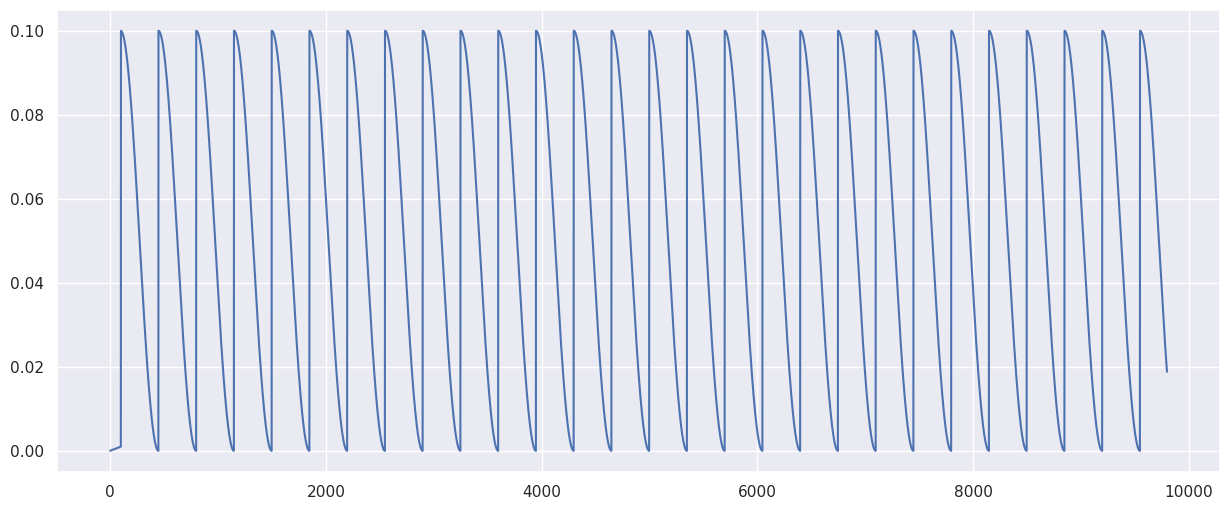

In [17]:
plt.rcParams["figure.figsize"] = (15,6)
plt.plot(warmup_callback.lrs)

That's it for this notebook :) For learning more about warmups I recommend checking out the following three papers as well as the discussions. Also, I highly recommend reading this blog post [Learning Rate Warmup with Cosine Decay in Keras/TensorFlow](https://stackabuse.com/learning-rate-warmup-with-cosine-decay-in-keras-and-tensorflow/) which I got quite a help while writing down the functions above.

**Papers:**

1. [Learning-Rate Annealing Methods for Deep Neural Networks](https://www.mdpi.com/2079-9292/10/16/2029)
2. [Accurate, Large Minibatch SGD:Training ImageNet in 1 Hour](https://arxiv.org/abs/1706.02677)
3. [SGDR: Stochastic Gradient Descent with Warm Restarts](https://arxiv.org/abs/1608.03983)

**Additional Sources:**
1. [What does "learning rate warm-up" mean?](https://stackoverflow.com/questions/55933867/what-does-learning-rate-warm-up-mean)
2. [A Newbie’s Guide to Stochastic Gradient Descent With Restarts](https://towardsdatascience.com/https-medium-com-reina-wang-tw-stochastic-gradient-descent-with-restarts-5f511975163 )
3. [In the context of Deep Learning, what is training warmup steps](https://datascience.stackexchange.com/questions/55991/in-the-context-of-deep-learning-what-is-training-warmup-steps)
4. [Machine Learning Concept - Step Size](https://numahub.com/articles/machine-learning-concept-step-size)

## General References

The references below are the main sources I used for preparing the notebooks in this repository. 

1. Murphy, K. P. (2022). Probabilistic machine learning: an introduction. MIT press.
2. Géron, A. (2022). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow. " O'Reilly Media, Inc.".
3. Chollet, F. (2021). Deep learning with Python. Simon and Schuster.
4. Kar, K. (2020). Mastering Computer Vision with TensorFlow 2. x: Build advanced computer vision applications using machine learning and deep learning techniques. Packt Publishing Ltd.
5. Planche, B., & Andres, E. (2019). Hands-On Computer Vision with TensorFlow 2: Leverage deep learning to create powerful image processing apps with TensorFlow 2.0 and Keras. Packt Publishing Ltd.
6. Lakshmanan, V., Görner, M., & Gillard, R. (2021). Practical Machine Learning for Computer Vision. " O'Reilly Media, Inc.".